PROJECT OBJECTIVE:
Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

1. Data Understanding and Preparation:

In [2]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing data set's
data1 = pd.read_csv("Part2+-+Data1.csv")

In [5]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [9]:
data1.shape

(5000, 8)

In [12]:
data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [16]:
data1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [4]:
data2 = pd.read_csv("Part2+-Data2.csv")

In [6]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [10]:
data2.shape

(5000, 7)

In [11]:
data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [17]:
data2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [18]:
merged_df = pd.merge(data1, data2, on='ID')

In [19]:
merged_df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [20]:
merged_df[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']] = merged_df[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']].astype('object')

In [23]:
merged_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


2. Data Exploration and Analysis:

In [25]:
merged_df['LoanOnCard'].unique()

array([nan,  1.,  0.])

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

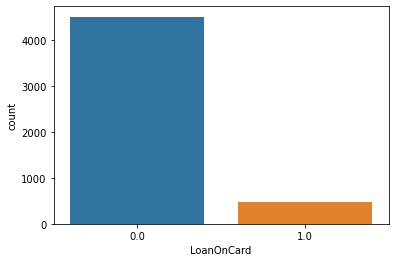

In [26]:
sns.countplot(x='LoanOnCard', data=merged_df)

Insights: 
1. The majority of customers do not have a loan on their credit card as the count of 0s is much higher than the count of 1s.
2. There is a class imbalance in the target variable as the count of 1s is much lower than the count of 0s.

In [28]:
missing_values_in_per = merged_df['LoanOnCard'].isna().sum() / len(merged_df) * 100
missing_values_in_per

0.4

In [30]:
merged_df['LoanOnCard'].fillna(merged_df['LoanOnCard'].mode()[0],inplace=True)

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 715.0+ KB


In [39]:
categorical = []
numerical = []

for i in merged_df.columns:
  if merged_df[i].dtype == 'int64' or merged_df[i].dtype == 'float64':
    numerical.append(i)
  else:
    # print(training_data_set[i][1])
    # if training_data_set[i] == "None":
    #   category_column.append(i)
    categorical.append(i)

In [40]:
categorical

['HiddenScore',
 'Level',
 'Security',
 'FixedDepositAccount',
 'InternetBanking',
 'CreditCard']

In [41]:
numerical

['ID',
 'Age',
 'CustomerSince',
 'HighestSpend',
 'ZipCode',
 'MonthlyAverageSpend',
 'Mortgage',
 'LoanOnCard']

In [44]:
merged_df['HiddenScore'].unique()

array([4, 3, 1, 2], dtype=object)

In [45]:
merged_df['Level'].unique()

array([1, 2, 3], dtype=object)

In [46]:
merged_df['Security'].unique()

array([1, 0], dtype=object)

In [47]:
merged_df['FixedDepositAccount'].unique()

array([0, 1], dtype=object)

In [48]:
merged_df['InternetBanking'].unique()

array([0, 1], dtype=object)

In [49]:
merged_df['CreditCard'].unique()

array([0, 1], dtype=object)

Therefore, i have checked for unexpected values in each categorical variable and imputing with best
suitable value is not required beacuse there is not unusual values. 

3. Data Preparation and model building:

In [56]:
#A. Split data into X and Y
#[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]
y=merged_df['LoanOnCard']
merged_df.drop(['ID', 'ZipCode','LoanOnCard'], axis=1, inplace=True)

KeyError: 'LoanOnCard'

In [57]:
merged_df

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [58]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: LoanOnCard, Length: 5000, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_df, y, test_size=0.01, random_state=42)

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [62]:
#Measure metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print(cm)

[[45  1]
 [ 2  2]]


Based on the matrix, there were 45 true positives (TP), 1 false positive (FP), 2 false negatives (FN), and 2 true negatives (TN).

TP: The model correctly predicted that 45 customers are likely to take a loan on a credit card.
FP: The model incorrectly predicted that 1 customer is likely to take a loan on a credit card.
FN: The model incorrectly predicted that 2 customers are not likely to take a loan on a credit card.
TN: The model correctly predicted that 2 customers are not likely to take a loan on a credit card.
From this confusion matrix, we can calculate the performance metrics like accuracy, precision, and recall of the model. The accuracy would be calculated as the sum of the diagonal (TP + TN) divided by the total number of observations, which is 50 in this case. The precision would be calculated as TP divided by (TP + FP), and the recall would be calculated as TP divided by (TP + FN).

In [63]:
from sklearn.metrics import accuracy_score,precision_score
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Accuracy: 0.94
Precision: 0.6666666666666666


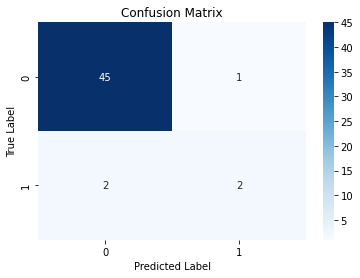

In [64]:
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels and title to the plot
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Display the plot
plt.show()

Insights:
Based on the confusion matrix and the performance metrics, it appears that the logistic regression model has performed reasonably well in predicting which customers are likely to take a loan on a credit card.

The model achieved an accuracy of 0.94, which indicates that it correctly classified 94% of the total observations in the test set. This is a good accuracy score, as it shows that the model can identify a large proportion of the customers who are likely to take a loan on a credit card.

However, the model's precision score of 0.67 indicates that the model's positive predictions (i.e., customers likely to take a loan on a credit card) are correct only 67% of the time. This means that the model is not very precise in identifying potential loan customers, and there is a relatively high false positive rate.

Overall, the model seems to perform reasonably well, but there is room for improvement in precision, which is a key metric for this particular business problem.